In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

class NetworkSpreader:
    def __init__(self, N, m, prob, seed=None):
        self.G = nx.barabasi_albert_graph(N, m, seed)
        self.colors = ['tab:blue']*self.G.number_of_nodes()
        self.infected = []
        self.step = 0
        assert prob <= 1
        self.prob = prob
        self.data = defaultdict(list)

        
    def collectData(self):
        self.data['Step'].append(self.step-1)
        self.data['Infection_Count'].append(len(self.infected))
        self.data['Infection_Fraction'].append(len(self.infected)/self.G.number_of_nodes())
            

    def infectNode(self, u):
        if u not in self.infected:
            self.infected.append(u)
            self.colors[u] = 'tab:red'
        
    def takeStep(self):
        if self.step == 0:
            self.infectNode(random.randint(0,self.G.number_of_nodes()-1))
            self.step += 1
            return
        
        nn = self.G.edges(self.infected)
        for n in nn:
            u = random.random()
            if u < self.prob:
                self.infectNode(n[0])
                self.infectNode(n[1])
        self.step += 1
        
    def run(self, step, plot):
        for i in range(step):
            s.takeStep()
            s.collectData()
            if plot:
                plt.figure(i)
                nx.draw_kamada_kawai(s.G, node_color=s.colors, with_labels=True)
        return s.data


- 'n' Number of nodes in the graph
- 'm' Number of new conncetions when a node is added (cf http://barabasi.com/f/66.pdf)
- 'steps' Number of infection iterations / days
- 'r' Probability to infect a neighbor


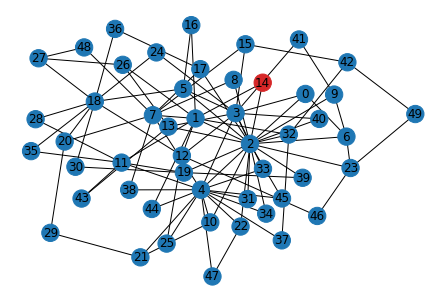

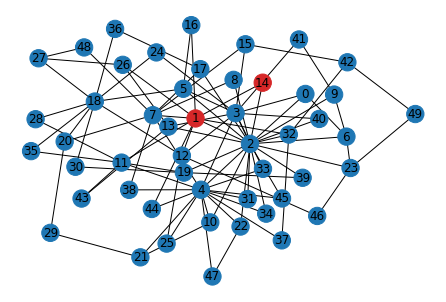

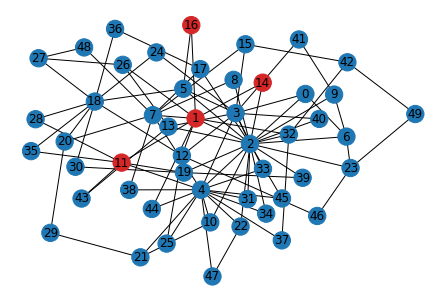

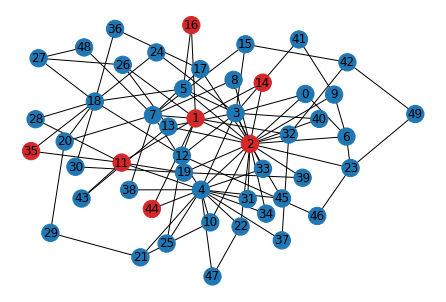

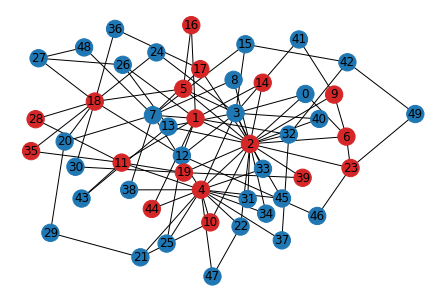

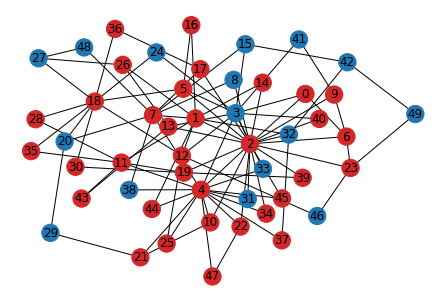

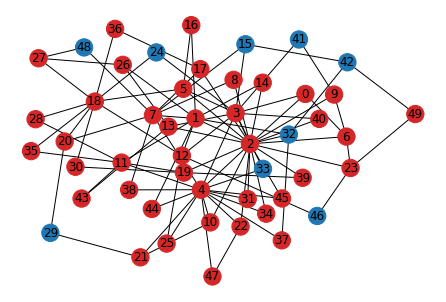

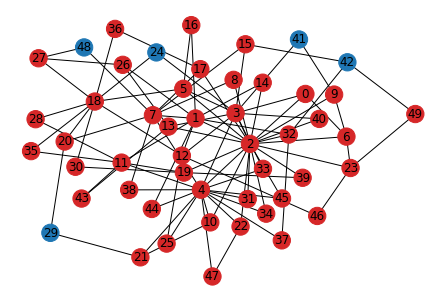

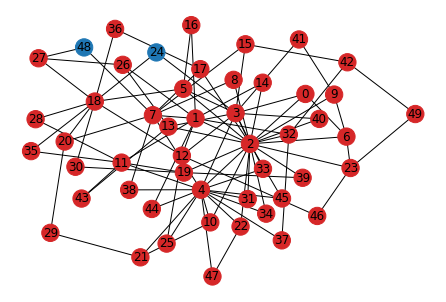

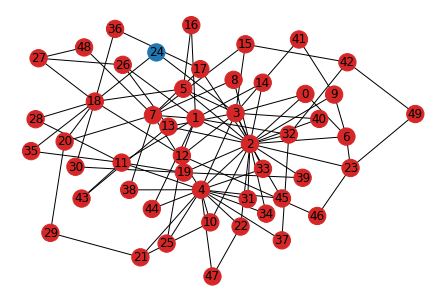

In [2]:
n = 50
m = 2
steps = 10
r = 0.33
s = NetworkSpreader(n, m, r)
_ = s.run(steps, True)

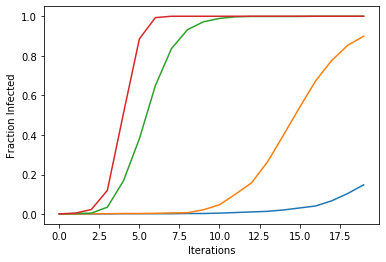

In [3]:
n = 1000
m = 2
steps = 20 
for r in (0.1,0.2,0.4,0.8):
    s = NetworkSpreader(n, m, r)
    data = s.run(steps, False)
    plt.plot(data['Step'], data['Infection_Fraction'], label=r)
plt.xlabel('Iterations')
plt.ylabel('Fraction Infected');

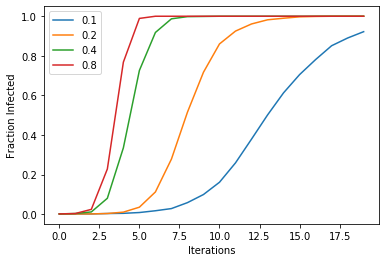

In [4]:
n = 1000
m = 3
steps = 20 
for r in (0.1,0.2,0.4,0.8):
    s = NetworkSpreader(n, m, r)
    data = s.run(steps, False)
    plt.plot(data['Step'], data['Infection_Fraction'], label=r)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fraction Infected');